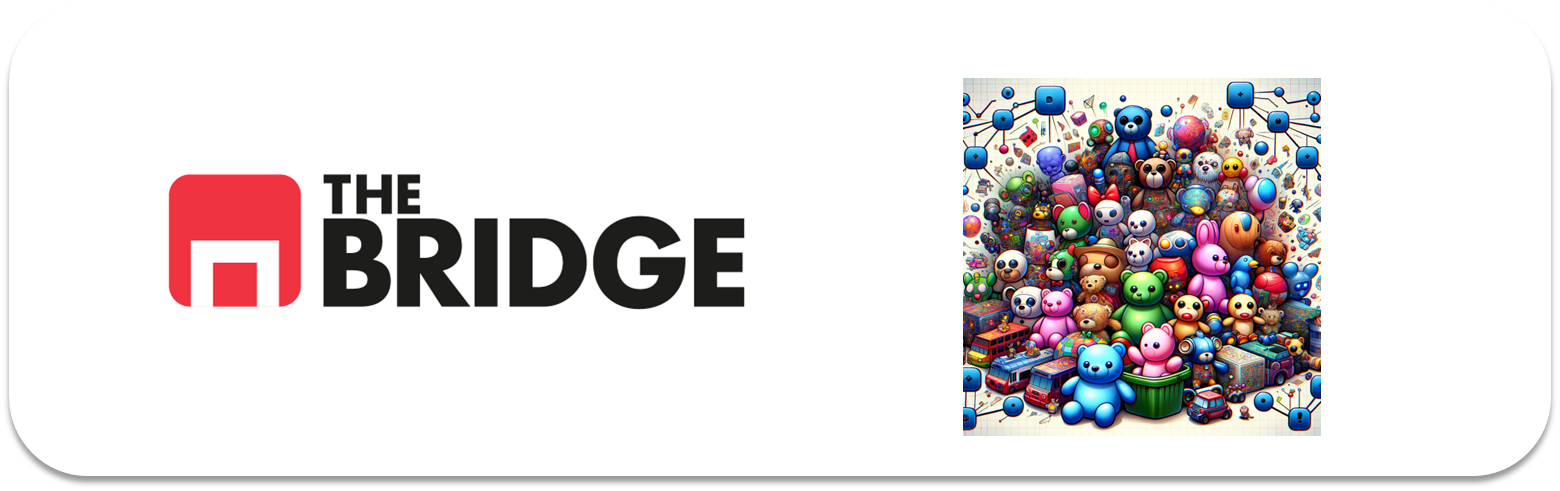

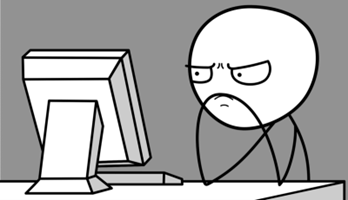

Para ejercitarte y afianzar lo aprendido sobre **DBSCAN**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Problema y "justificación": DBSCAN

Como sabemos, existen diversas técnicas de clusterización comprendidas por algoritmos de machine learning no supervisados, cuya finalidad es agrupar distintos elementos de una data sin la necesidad de estar previamente etiquetados. 

Anteriormente utilizamos el algoritmo de KMeans, sin embargo, dicho algoritmo tiene algunas limitaciones, como el hecho de que no siempre es sencillo obtener un número de K clusters óptimo o que algunas distribuciones de datos no se ajustan a la agrupación por clusters debido a la naturaleza del algoritmo. Para estos casos existen diversos algoritmos de clusterización. 

A continuación, vamos a utilizar el algoritmo DBSCAN (Density-Based Spatial Clustering of Applications with Noise) para capturar grupos en data con patrones relativamente complejos.

Utilizaremos data de clientes de un distribuidor al por mayor, en el que se recogen por línea ventas a diferentes establecimientos y empresas de sus productos (aunque no se incluye el identificador de establecimiento) y cuyo objetivo es obtener agrupacioines interesantes (agrupaciones no predefinidas de productos que se suelen comprar juntos):

Features:

    1) FRESH: Gastos en productos frescos;
    2) MILK: Gastos en productos lacteos;
    3) GROCERY: Gastos en comestibles;
    4) FROZEN: Gastos en congelados;
    5) DETERGENTS_PAPER: Gastos en detergentes y derivados del papel;
    6) DELICATESSEN: Gatos en comestibles finos;
    7) CHANNEL: Canal que utilizan los clientes para vender - Horeca (Hotel/Restaurant/Cafeterías) o Retail channel (Al por menor);
    8) REGION: Región del cliente;

Fuente: https://archive.ics.uci.edu/ml/datasets/Wholesale+customers

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [15]:

import numpy as np
import pandas as pd

### Ejercicio 1

Carga los datos y haz una primera exploración, incluyendo una descripción de las variables numéricas.

In [5]:
df = pd.read_csv('./data/wholesale-customers-data.csv')
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


$$***$$

Es hora de hacer un miniEda (cuyo objetivo en el caso de clusterizacion no es obtener features para predicción de un target que no tenemos), cuyo objetivo es poder intuir posibles agrupaciones y su número, detectar si hay que hacer transformaciones y escalado en las variables y cuál

### Ejercicio 2



Pinta el histograma de las variables y determina cuáles podríamos considerar numéricas continuas y cuáles numéricas discretas (o categóricas)

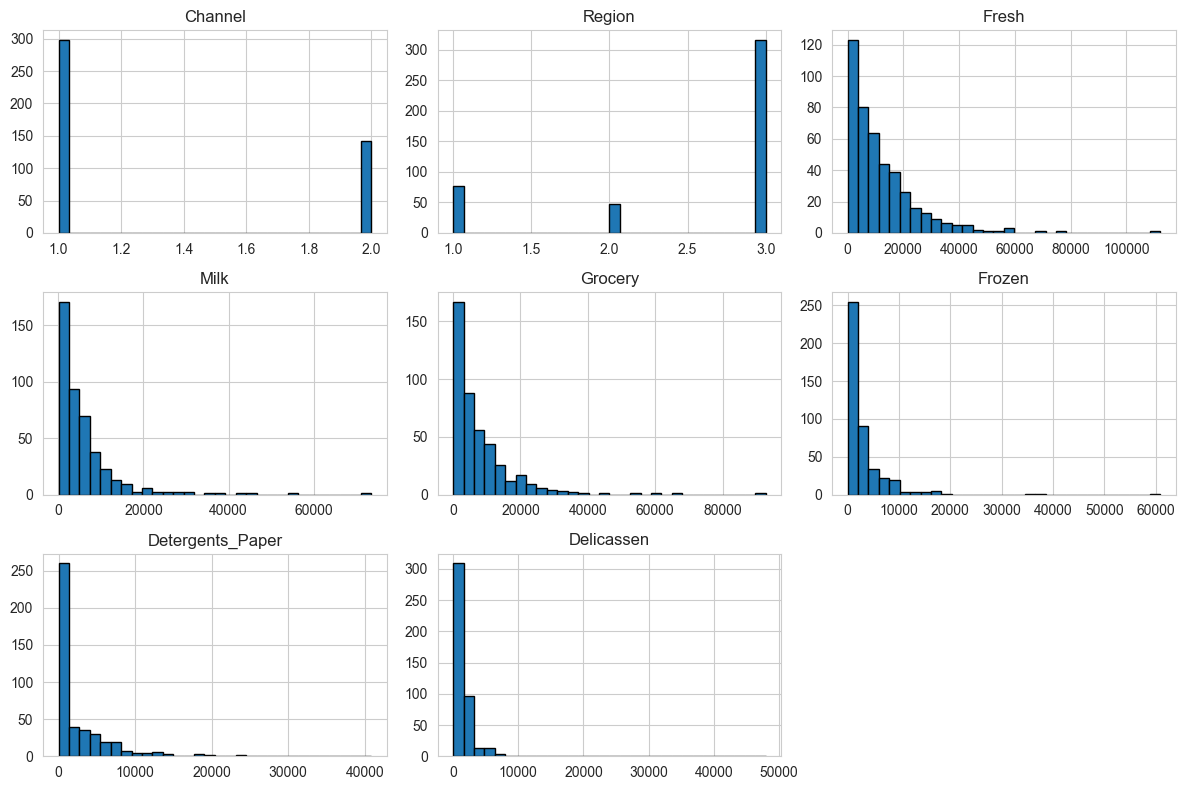

Variables continuas: ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
Variables discretas/categóricas: ['Channel', 'Region']


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear histogramas para todas las variables
df.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

# Determinar variables continuas y discretas
variables_continuas = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]
variables_discretas = ["Channel", "Region"]

print(f"Variables continuas: {variables_continuas}")
print(f"Variables discretas/categóricas: {variables_discretas}")


### Ejercicio 3

Antes de decidir sobre las agrupaciones, vamos pintar los histrogramas pero separando por canal (ya que es un elemento muy diferenciador del tipo de venta que se realiza a mayorista). Muestra graficamente para cada variable numérica su histograma para cada canal (Horeca y Retail). 

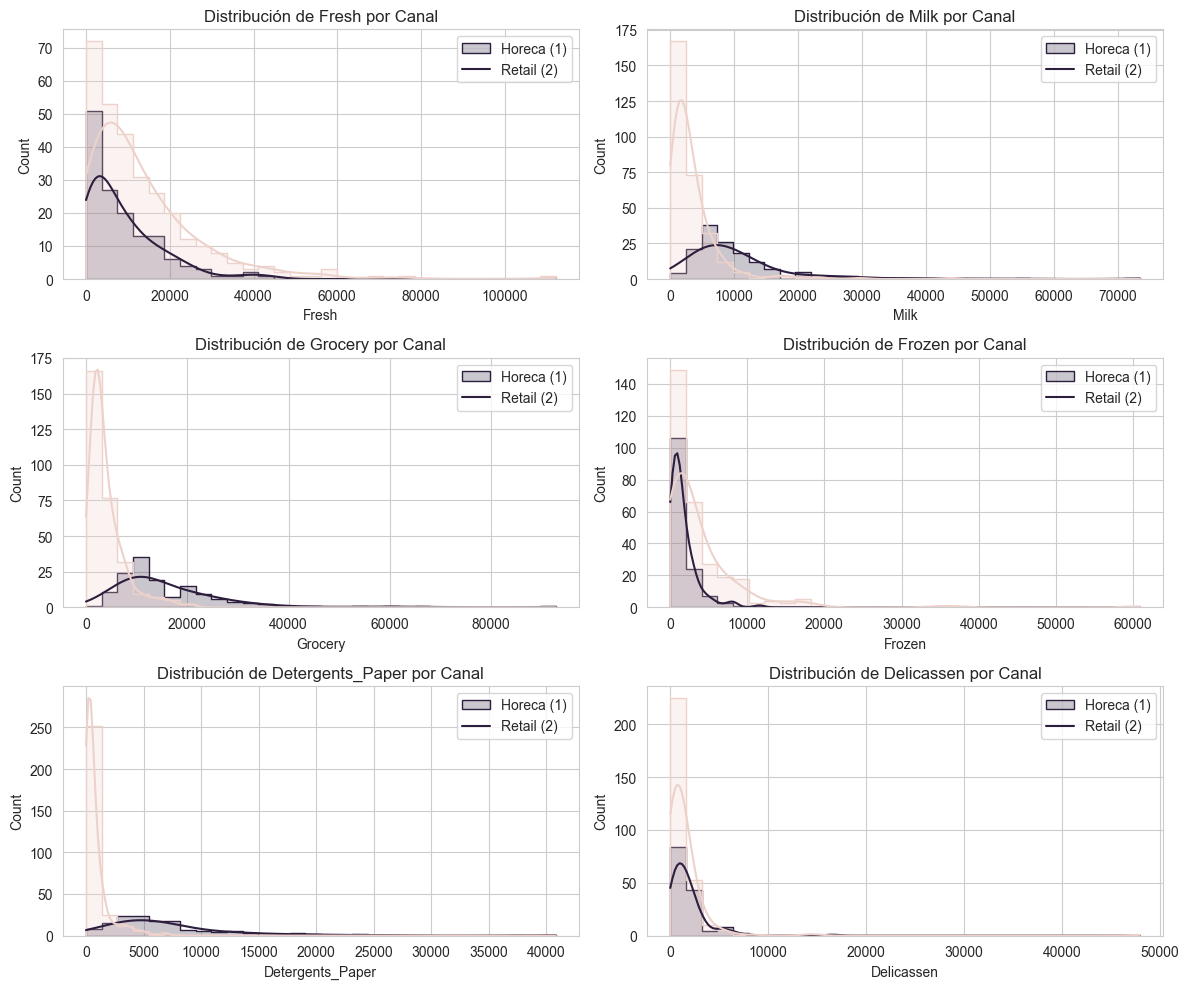

In [9]:
# Definir el tamaño de la figura
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Variables numéricas continuas
variables = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Graficar histogramas separados por canal
for var, ax in zip(variables, axes.flatten()):
    sns.histplot(data=df, x=var, hue="Channel", bins=30, kde=True, element="step", ax=ax)
    ax.set_title(f"Distribución de {var} por Canal")
    ax.legend(["Horeca (1)", "Retail (2)"])

plt.tight_layout()
plt.show()


### Ejercicio 4

Analicemos los outliers. Obten los outliers a partir de los diagramas de boxplot para todos los datos y luego separados por canal.

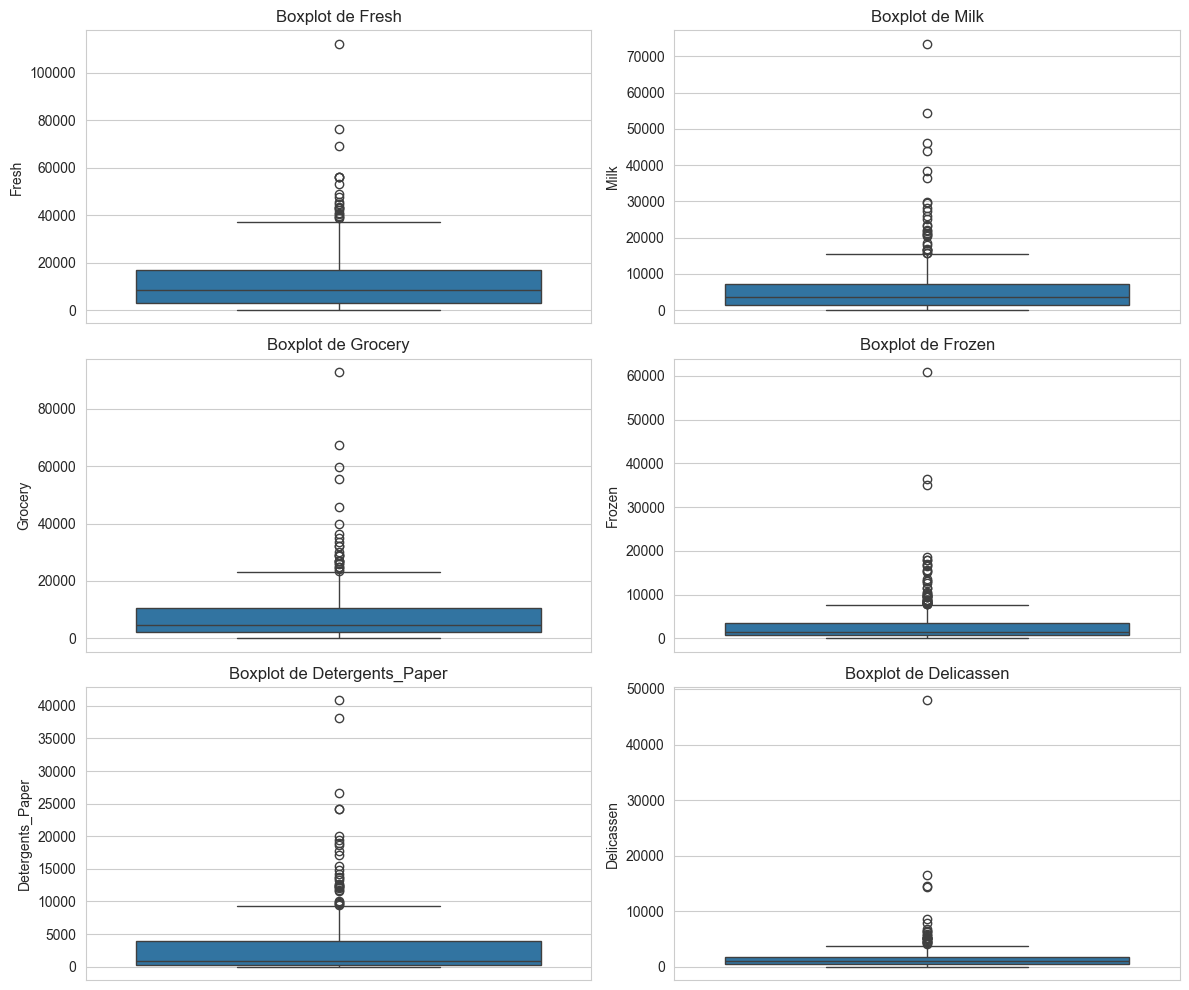

/var/folders/lc/xsbjt6rs2gq59y6tqrhdjzb40000gn/T/ipykernel_24539/3028180440.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Horeca (1)", "Retail (2)"])
/var/folders/lc/xsbjt6rs2gq59y6tqrhdjzb40000gn/T/ipykernel_24539/3028180440.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Horeca (1)", "Retail (2)"])
/var/folders/lc/xsbjt6rs2gq59y6tqrhdjzb40000gn/T/ipykernel_24539/3028180440.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Horeca (1)", "Retail (2)"])
/var/folders/lc/xsbjt6rs2gq59y6tqrhdjzb40000gn/T/ipykernel_24539/3028180440.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a

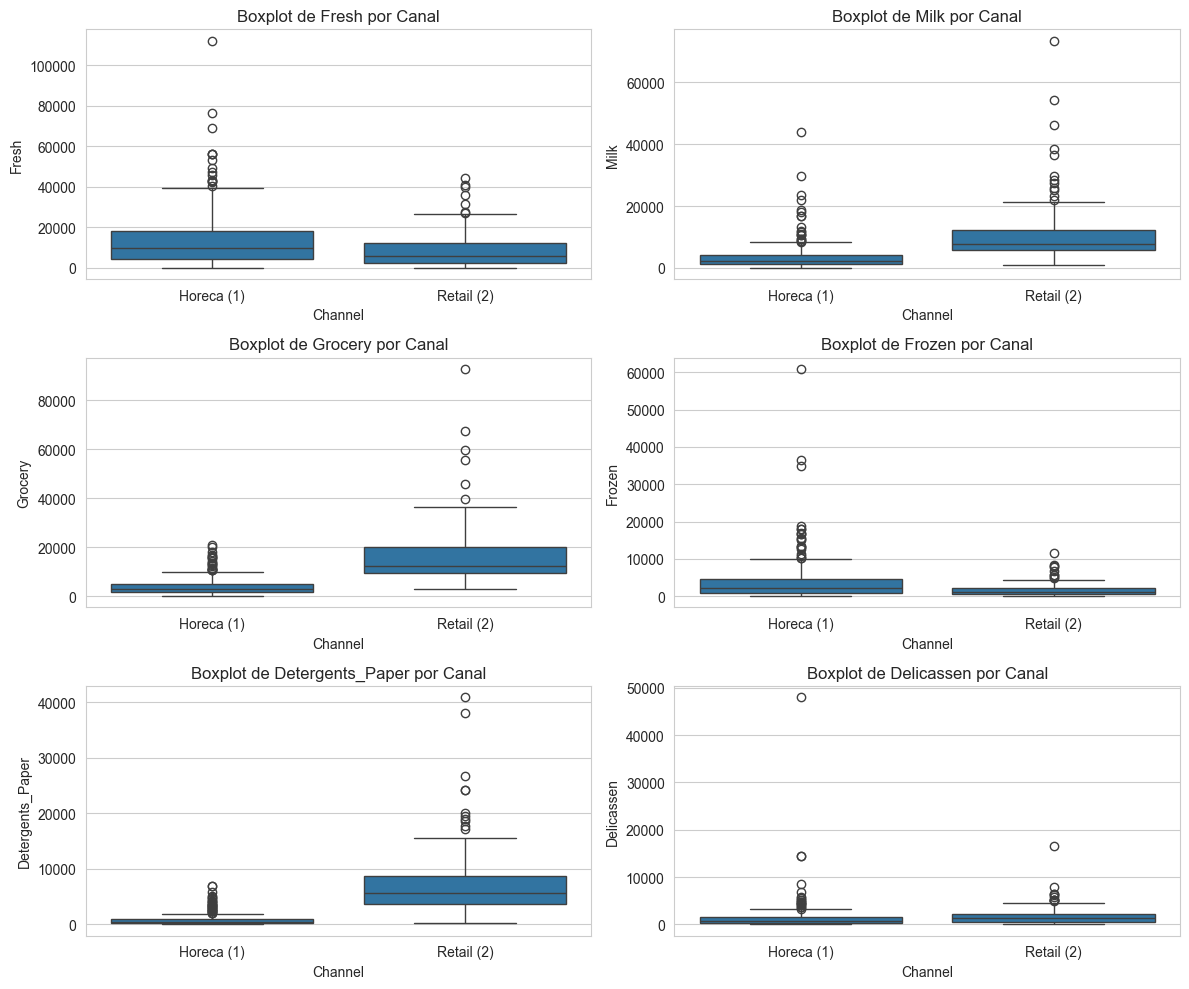

In [10]:
# Definir el tamaño de la figura
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

# Variables numéricas continuas
variables = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Graficar boxplots para detectar outliers
for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(data=df, y=var, ax=ax)
    ax.set_title(f"Boxplot de {var}")

plt.tight_layout()
plt.show()

# Boxplots separados por canal
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))

for var, ax in zip(variables, axes.flatten()):
    sns.boxplot(data=df, x="Channel", y=var, ax=ax)
    ax.set_title(f"Boxplot de {var} por Canal")
    ax.set_xticklabels(["Horeca (1)", "Retail (2)"])

plt.tight_layout()
plt.show()


### Ejercicio 5

Vamos a intentar detectar posibles agrupaciones en los datos con variables dos a dos. Utiliza un pairplot de sns para mostrar los scatter plots de las variables numéricas dos a dos e intentar visualizar algún clustering e incluso justificar usar kMeans o DBSCAN. En este ejercicio hazlo para todo el dataset.

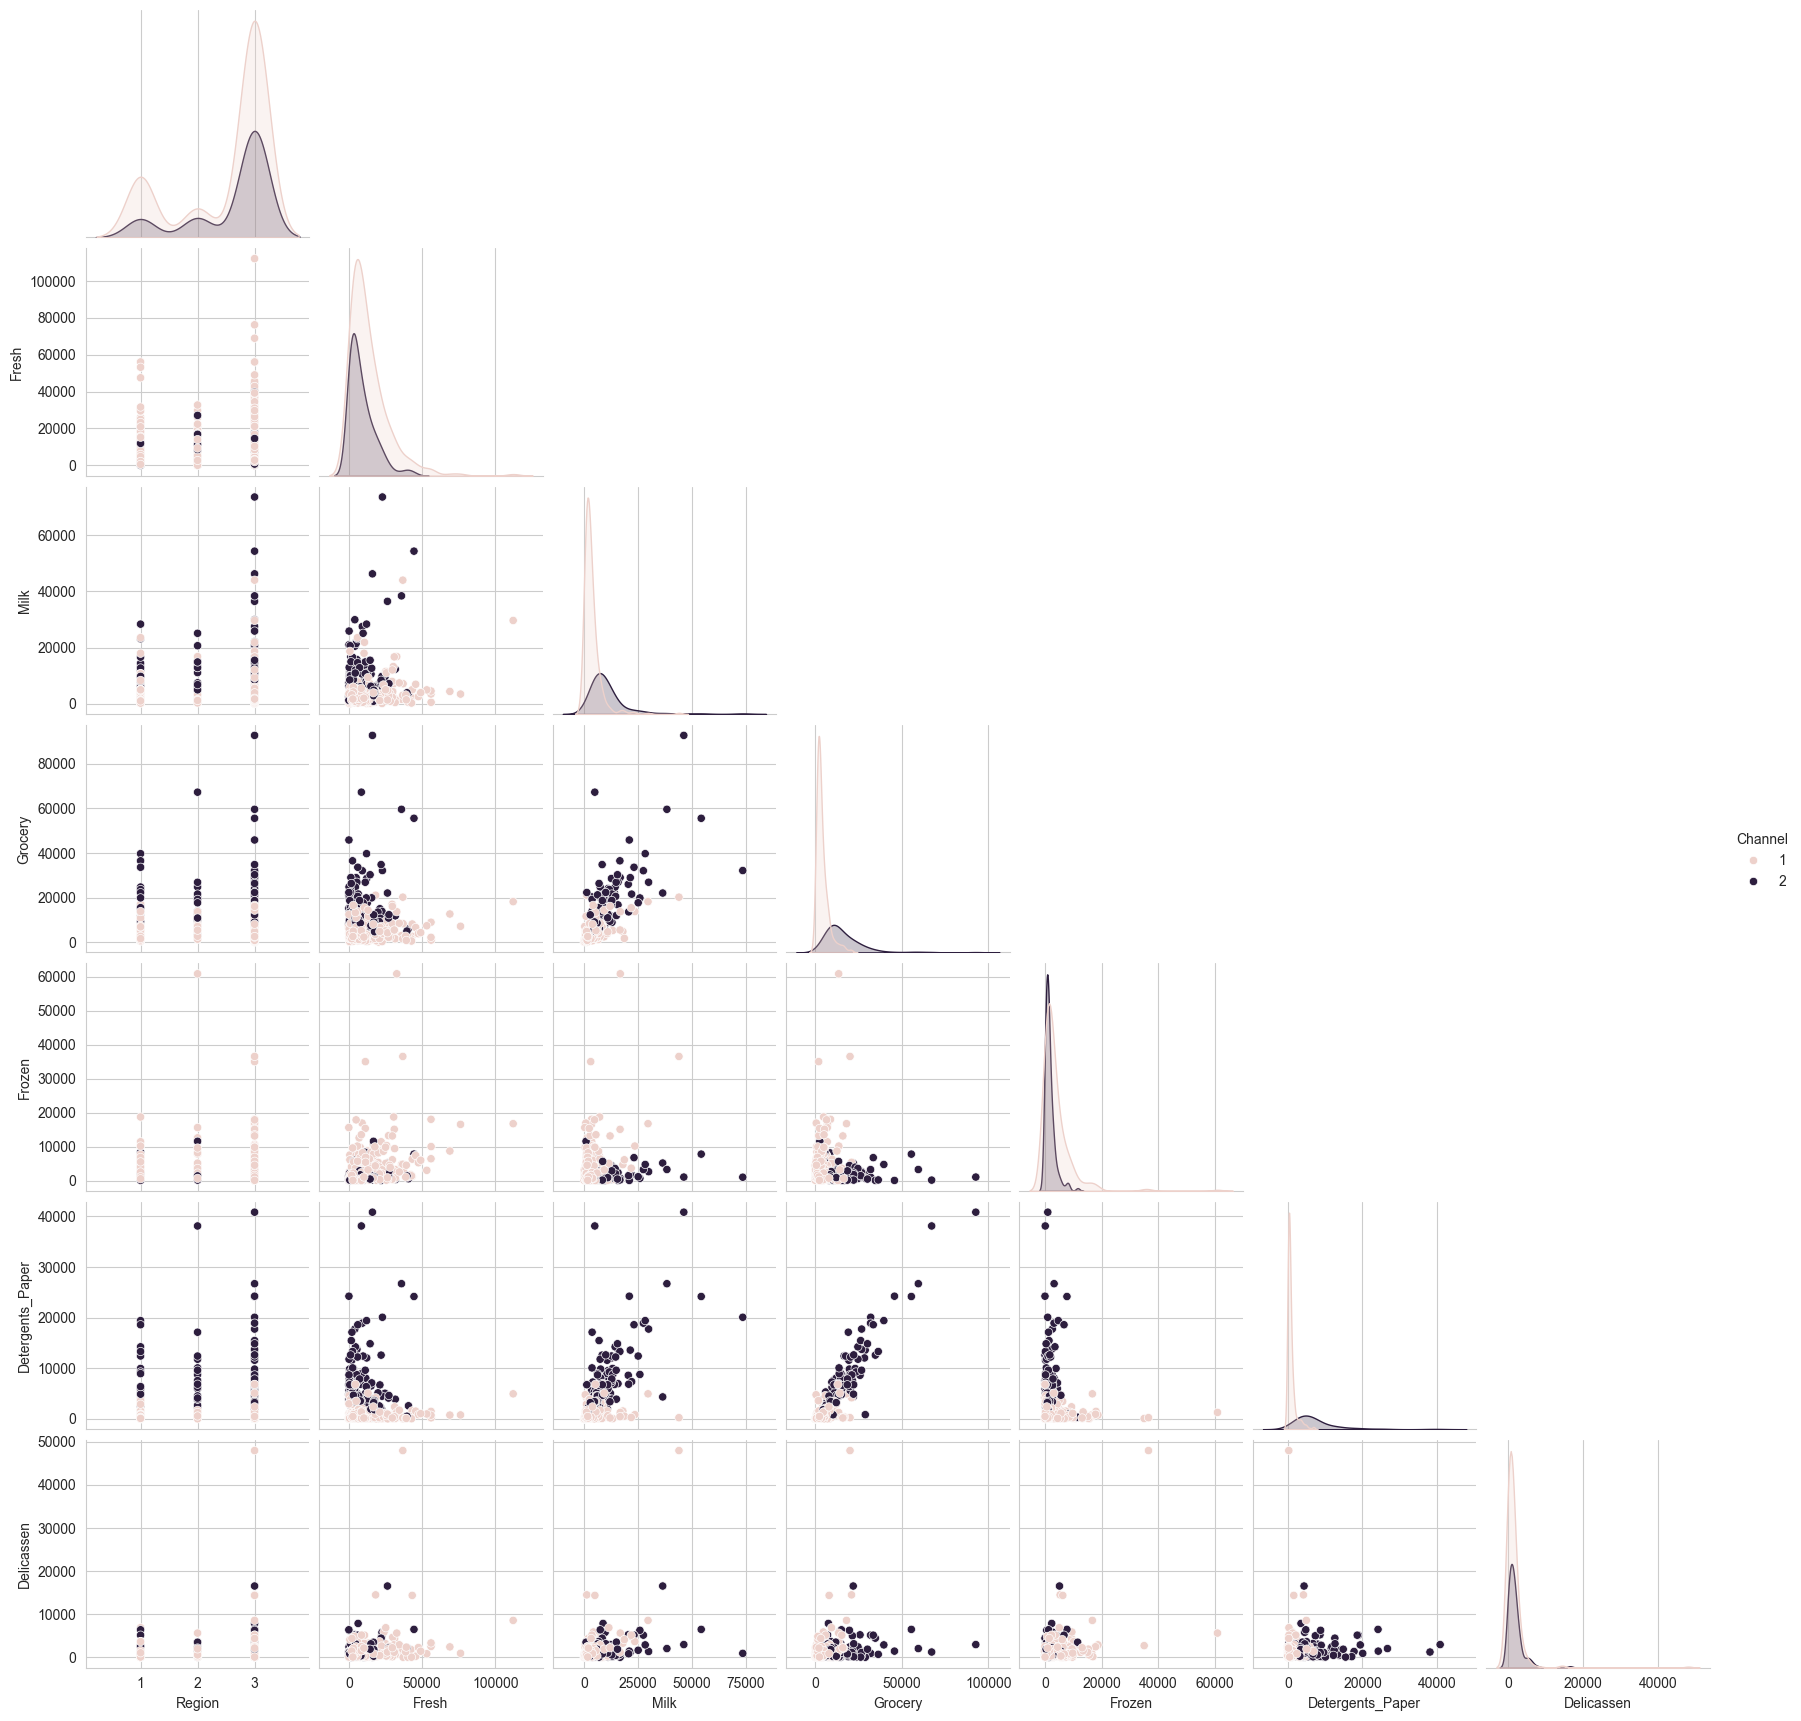

In [12]:
# Crear pairplot con todas las variables numéricas
sns.pairplot(df, hue="Channel", diag_kind="kde", corner=True)

# Mostrar la gráfica
plt.show()


### Ejercicio 6

Repite el ejercicio 5 pero separando por canal. Emplea el argumento hue del pairplot para no tener que hacer dos pairplots diferentes. 

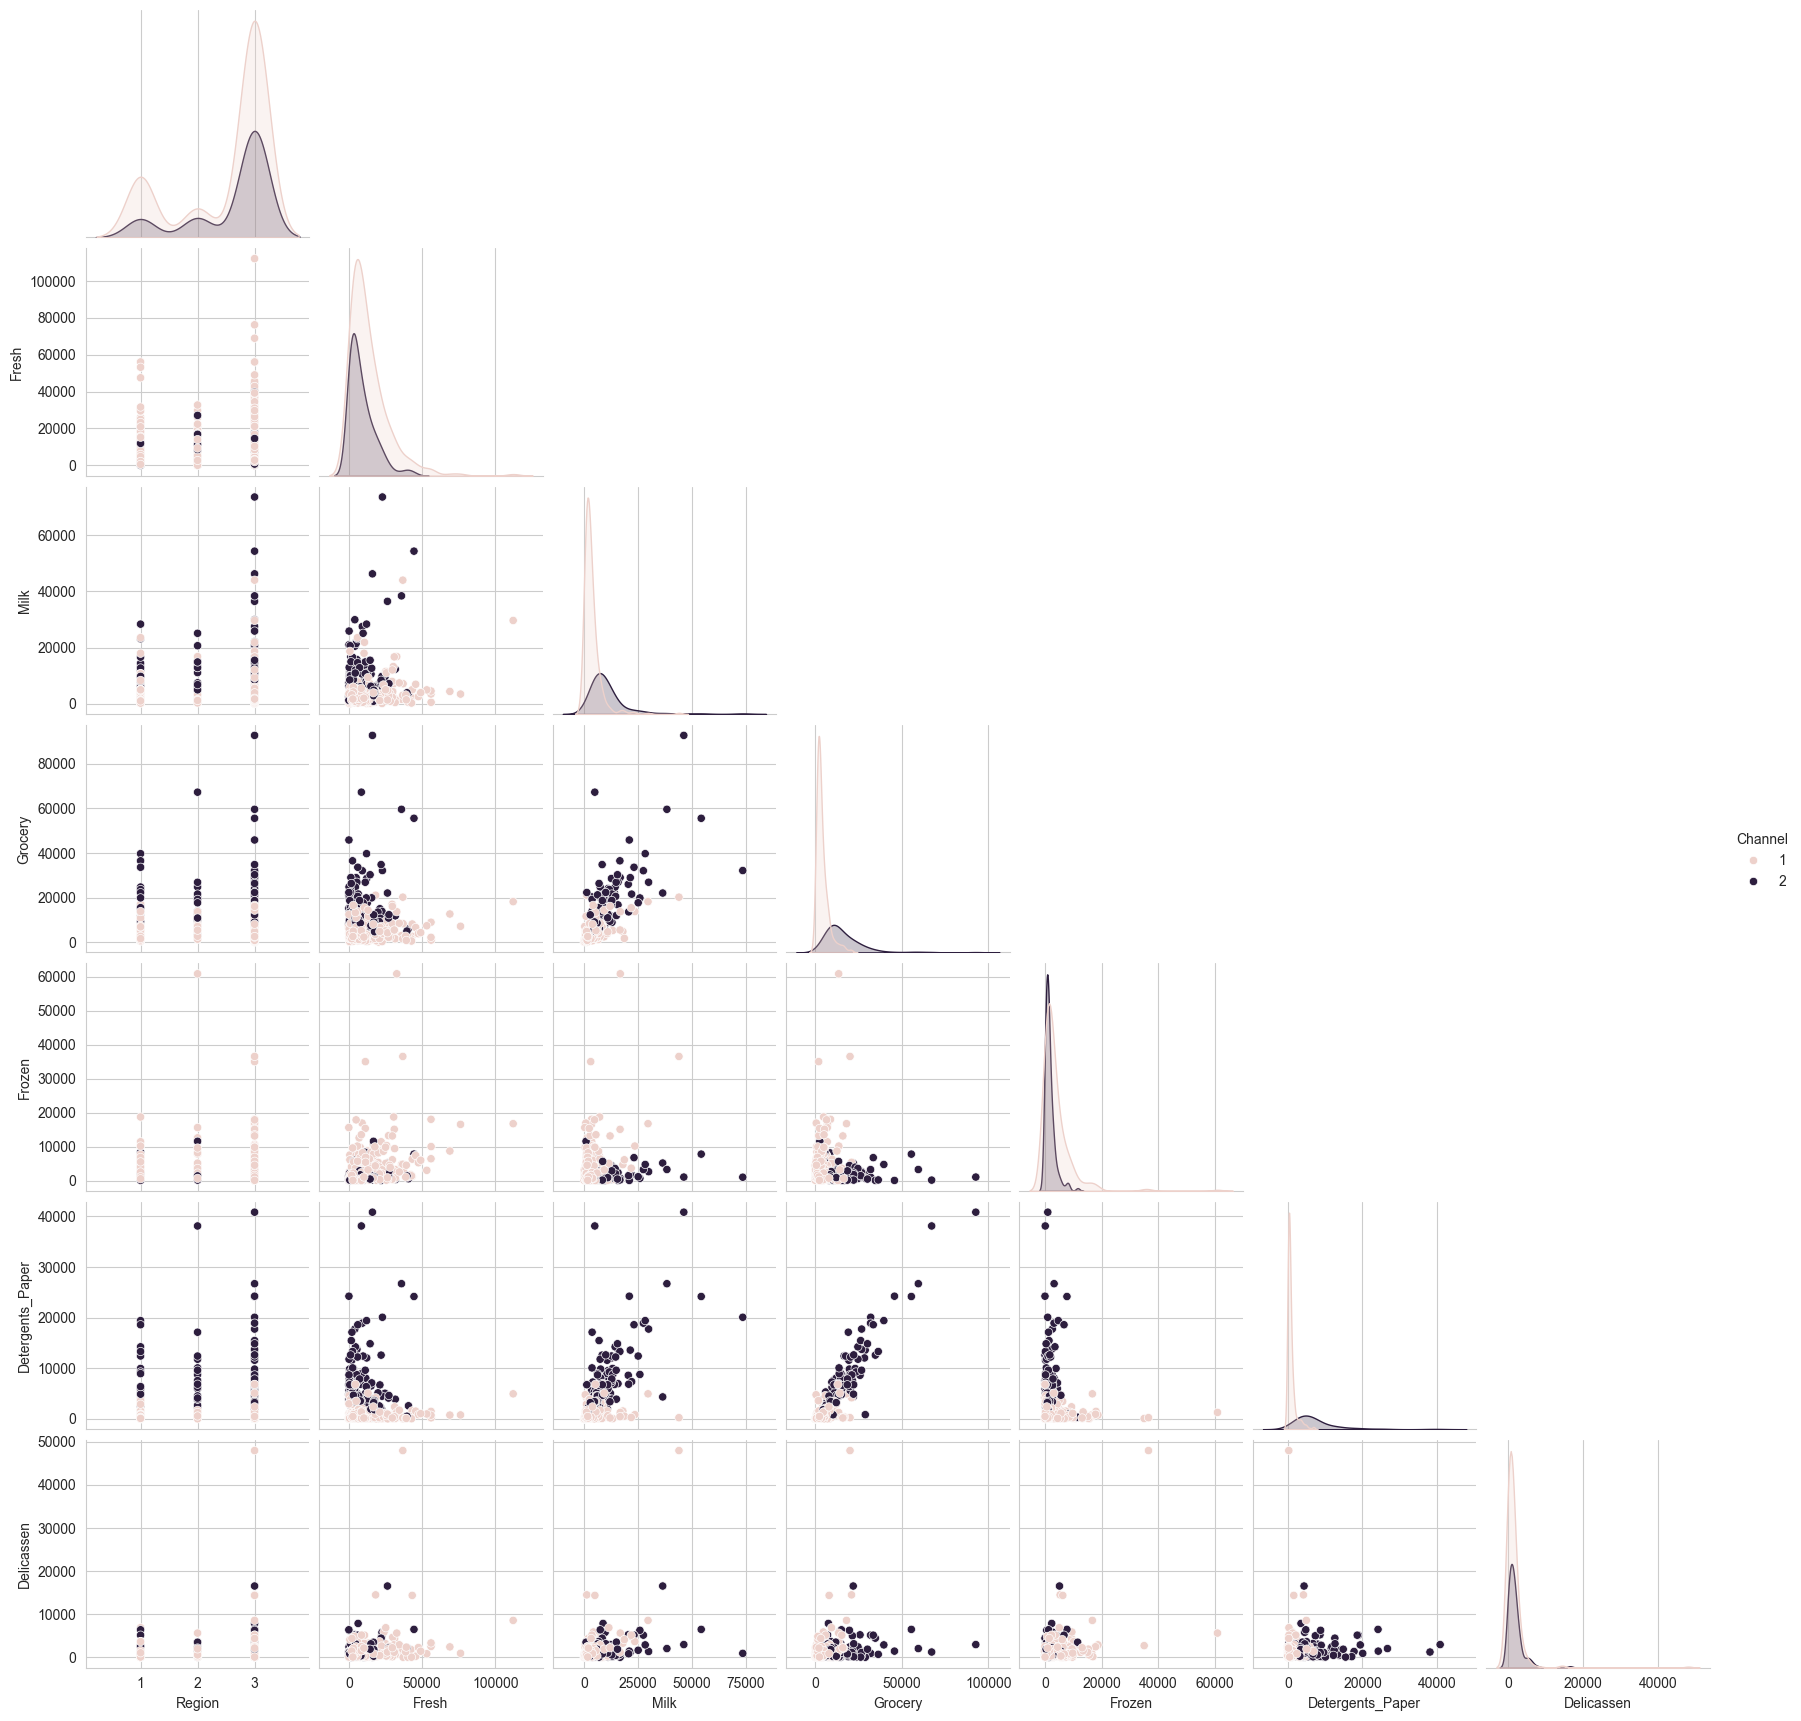

In [13]:
# Crear pairplot separado por canal
sns.pairplot(df, hue="Channel", diag_kind="kde", corner=True)

# Mostrar la gráfica
plt.show()


### Ejercicio 7

Si has logrado hacer los dos ejercicios anteriores (y si no consulta su solución) tendrás una idea un poco más clara de por qué es interesante la clusterización con DBSCAN mejor que con KMeans. Así que vamos a utilizarlo, pero antes escalemos los datos, transformándolos primero (de primeras no vamos a distinguir entre canales, hazlo con todo el dataseet). Es decir aplica la tranformación que creas necesaria en las columnas numéricas que creas conveniente. Hazlo en un dataframe copiado del original para poder interpretar los valores correctamente al final.

In [14]:
from sklearn.preprocessing import StandardScaler, PowerTransformer

# Copiar el DataFrame original
df_scaled = df.copy()

# Seleccionar las columnas numéricas a transformar (excluyendo 'Channel' y 'Region')
num_cols = ["Fresh", "Milk", "Grocery", "Frozen", "Detergents_Paper", "Delicassen"]

# Aplicar transformación PowerTransformer para manejar la asimetría en la distribución
pt = PowerTransformer()
df_scaled[num_cols] = pt.fit_transform(df_scaled[num_cols])

# Escalar los datos con StandardScaler
scaler = StandardScaler()
df_scaled[num_cols] = scaler.fit_transform(df_scaled[num_cols])

# Mostrar las primeras filas del DataFrame transformado
print(df_scaled.head())


   Channel  Region     Fresh      Milk   Grocery    Frozen  Detergents_Paper  \
0        2       3  0.413012  0.979454  0.394901 -1.457973          0.620530   
1        2       3 -0.110911  0.995243  0.628376  0.080081          0.751556   
2        2       3 -0.195814  0.888063  0.410688  0.332499          0.793104   
3        1       3  0.458126 -0.965336 -0.154740  1.173953         -0.372736   
4        2       3  1.028870  0.412660  0.346961  0.742061          0.367767   

   Delicassen  
0    0.338074  
1    0.602222  
2    2.240051  
3    0.608674  
4    1.737333  


### Ejercicio 8

Escala las columnas que creas necesario. Si no lo tienes claro, escala todas.

### Ejercicio 9

En el caso de los modelos no supervisados, una vez hemos tratado las features hay que escoger los hiperparámetros. En el caso de dBSCAN no es el número de clústeres, sino la distancia `eps` que determina el vecindario de un punto y el número de vecinos a partir del cual se decide si una instancia es core o no (`min_samples`). 

Una forma de hacerlo es iterar sobre rangos de estos dos hiperparámetros midiendo el porentaje de "anomalías" que detecta y considerando como punto de parada un valor por debajo del 10%.

NOTA: Usa el doble de cantidad de tus features para el mínimo de elementos y un rango para el epsilon de 0.001 a 3. Para min_samples vamos a usar un valor "estimado" que corresponde a 2 veces el número de features empleadas.

In [16]:
from sklearn.cluster import DBSCAN

# Definir el rango de eps y min_samples
eps_range = np.linspace(0.001, 3, 50)  # 50 valores entre 0.001 y 3
min_samples = 2 * len(num_cols)  # Doble del número de features

# Lista para almacenar los resultados
outlier_percentages = []

# Iterar sobre los valores de eps
for eps in eps_range:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(df_scaled[num_cols])
    
    # Calcular porcentaje de outliers (-1 en labels significa ruido)
    outliers = np.sum(labels == -1)
    outlier_percentage = outliers / len(df_scaled) * 100
    outlier_percentages.append(outlier_percentage)
    
    # Parar si bajamos del 10%
    if outlier_percentage < 10:
        best_eps = eps
        break

print(f"Mejor valor de eps encontrado: {best_eps}")


Mejor valor de eps encontrado: 1.5311020408163265


### Ejercicio 10

Entrena un clustering DBSCAN con el valor que hayas encontrado como mejor en el ejercicio anterior (si no has visto claramente un valor, usa eps = 2) y `min_samples` a dos veces el número de features empleadas.

In [17]:
# Definir hiperparámetros
best_eps = best_eps if 'best_eps' in locals() else 2  # Usa el mejor valor encontrado o eps=2
min_samples = 2 * len(num_cols)  # Doble del número de características

# Entrenar DBSCAN
dbscan = DBSCAN(eps=best_eps, min_samples=min_samples)
labels = dbscan.fit_predict(df_scaled[num_cols])

# Agregar las etiquetas al DataFrame original
df["Cluster"] = labels

# Mostrar el número de puntos en cada clúster
print(df["Cluster"].value_counts())


Cluster
 0    397
-1     43
Name: count, dtype: int64


### Ejercicio 11

Agrega las etiquetas generadas con DBSCAN a tu dataframe original e interpreta los resultados (observa el número de etiquetas, recuerda que -1 no es un cluster son anomalías o outliers) luego contesta a: ¿Qué grupos o patrones fué capaz de capturar el DBSCAN? (Haz las tablas de contingencia de las etiquetas con las dos variables categóricas, por separado, por ejemplo y a partir de ahí justifica tu respuesta)

In [18]:
# Agregar las etiquetas generadas por DBSCAN al DataFrame original
df["Cluster"] = labels

# Mostrar las primeras filas para ver cómo se añadieron las etiquetas
print(df.head())

# Mostrar el número de puntos en cada clúster
print(df["Cluster"].value_counts())

# Crear tablas de contingencia para las variables categóricas (Channel y Region) con las etiquetas generadas
contingency_channel = pd.crosstab(df["Cluster"], df["Channel"])
contingency_region = pd.crosstab(df["Cluster"], df["Region"])

# Mostrar las tablas de contingencia
print("\nTabla de contingencia - Cluster vs Channel:")
print(contingency_channel)

print("\nTabla de contingencia - Cluster vs Region:")
print(contingency_region)


   Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicassen  Cluster  
0        1338        0  
1        1776        0  
2        7844        0  
3        1788        0  
4        5185        0  
Cluster
 0    397
-1     43
Name: count, dtype: int64

Tabla de contingencia - Cluster vs Channel:
Channel    1    2
Cluster          
-1        33   10
 0       265  132

Tabla de contingencia - Cluster vs Region:
Region    1   2    3
Cluster             
-1        5   3   35
 0       72  44  281
